In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [10]:
X=boston.data
y=boston.target

In [15]:
model=LinearRegression()
model.fit(X,y)
y_pred=model.predict(X)


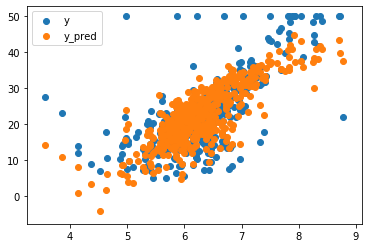

In [17]:
plt.scatter(X[:,5],y,label='y')
plt.scatter(X[:,5],y_pred,label='y_pred')
plt.legend()

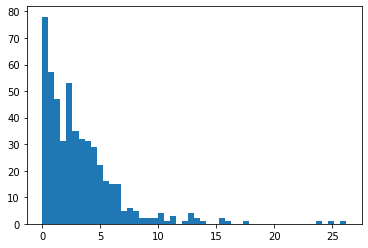

In [24]:
err_hist=np.abs(y-y_pred)
plt.hist(err_hist,bins=50)
plt.show()

In [25]:
model.score(X,y)

0.7406426641094095

REgression lineaire simple avec Numpy
==

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

1.Dataset
==

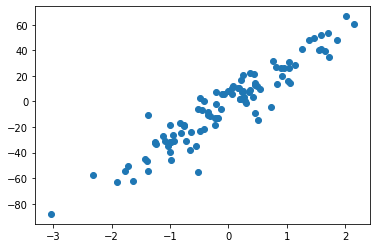

In [15]:
x,y=make_regression(n_samples=100,n_features=1, noise=10)
plt.scatter(x,y) #  afficher les resultat sous forme graphique x en abscisse et y en ordonnées

In [16]:
# verification des dimensions
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [17]:
#  redimensionner les dimensions
y=y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)


In [18]:
#  construction de la matrice X, incluant le biais
x=np.hstack((x,np.ones(x.shape)))
print(x.shape)
print(x[:10])

(100, 2)
[[ 1.14005147  1.        ]
 [-1.3752741   1.        ]
 [ 0.16146483  1.        ]
 [-0.17938141  1.        ]
 [ 1.65978875  1.        ]
 [ 0.05885614  1.        ]
 [ 0.24176874  1.        ]
 [-0.0726655   1.        ]
 [-0.95490925  1.        ]
 [-0.41810501  1.        ]]


In [25]:
#  Initialisation du theta aléatoire
theta=np.random.randn(2,1)
theta

array([[ 1.95959227],
       [-0.62802569]])

2.Modèle linéaire
==

On implémente un modèle F=X . theta puis on teste le modèle

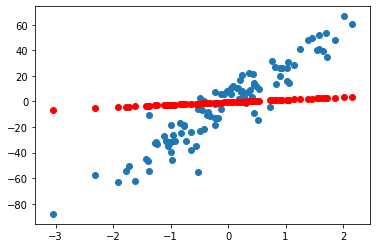

In [26]:
def model(x,theta):
    return x.dot(theta)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],model(x,theta),c='r')

3.Fonction coût: Erreur quadratique moyenne
    ==

In [27]:
def cost_function(x,y,theta):
    m=len(y)
    return (1/(2*m))*np.sum((model(x,theta)-y)**2)

In [28]:
cost_function(x,y,theta)

418.253742659328

4.Gradient et Descente de gradient
==

On implémente la formule du gradient pour le MSE

In [30]:
def grad(x,y,theta):
    m=len(y)
    return (1/m) * x.T.dot(model(x,theta)-y)

On utilise cette fonction dans la descente du Gradient

In [31]:
def gradient_descent(x,y,theta,learning_rate,n_iterations):
    cost_history=np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta=theta - (learning_rate * grad(x,y,theta)) #  mise a jour des paramètres theta (formule du gradient descends)
        cost_history[i] = cost_function(x,y,theta) #  on enregistre la valeur du cout autour de i dans cost_history
    return theta, cost_history
          

5.Phase d'entrainement
==

On définit un nombre d'itération ainsi qu'un pas d'apprentissage alpha, et c'est parti

Une fois le modèle entrainé, on observe les résultats par rapport à notre Dataset

In [32]:
n_iterations=1000
learning_rate=0.01

In [33]:
theta_final,cost_history = gradient_descent(x,y,theta,learning_rate,n_iterations)

In [34]:
 #  les paramètres du modèle une fois que celui ci a été entrainé
theta_final

array([[28.54633426],
       [-1.60787967]])

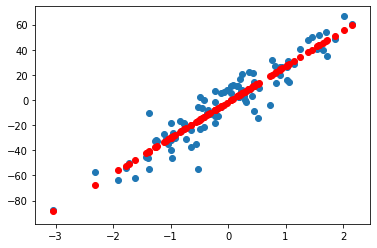

In [36]:
 #  creation d'un vecteur prediction qui contient les prédictions de notre modèle final
predictions=model(x,theta_final)
    
 #  Afficher les résultats de prédictions (en rouge) par rapport à notre Dataset (bleu)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],predictions,c='r')
    

6.Courbe d'apprentissage
==

On vérifie si vraiment l'algorithme à bien convergé

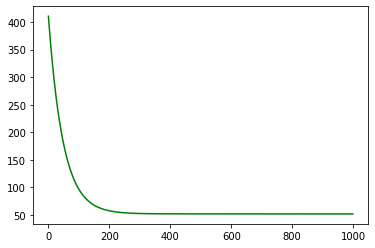

In [38]:
plt.plot(range(n_iterations),cost_history,c='green') 

On verifie la performance du modèle avec le coefficient du détermination

In [42]:
def coef_determination(y,pred):
    u=((y - pred)**2).sum()
    v=((y - y.mean())**2).sum()
    return 1 - (u/v)
coef_determination(y,predictions)

0.8905160648470638